In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
drivers_df=pd.read_csv('/content/drive/My Drive/FODS_Project/drivers.csv',encoding='latin1')
results_df=pd.read_csv('/content/drive/My Drive/FODS_Project/results.csv')
driverStandings_df=pd.read_csv('/content/drive/My Drive/FODS_Project/driverStandings.csv')

In [ ]:
drivers_df

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44.0,HAM,Lewis,Hamilton,07/01/1985,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,NaN,HEI,Nick,Heidfeld,10/05/1977,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6.0,ROS,Nico,Rosberg,27/06/1985,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14.0,ALO,Fernando,Alonso,29/07/1981,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,NaN,KOV,Heikki,Kovalainen,19/10/1981,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
837,838,vandoorne,2.0,VAN,Stoffel,Vandoorne,26/03/1992,Belgian,http://en.wikipedia.org/wiki/Stoffel_Vandoorne
838,839,ocon,31.0,OCO,Esteban,Ocon,17/09/1996,French,http://en.wikipedia.org/wiki/Esteban_Ocon
839,840,stroll,18.0,STR,Lance,Stroll,29/10/1998,Canadian,http://en.wikipedia.org/wiki/Lance_Stroll
840,841,giovinazzi,36.0,GIO,Antonio,Giovinazzi,14/12/1993,Italian,http://en.wikipedia.org/wiki/Antonio_Giovinazzi


In [ ]:
results_df 

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,34:50.6,5690616.0,39.0,2.0,01:27.5,218.3,1
1,2,18,2,2,3.0,5,2.0,2,2,8.0,58,5.478,5696094.0,41.0,3.0,01:27.7,217.586,1
2,3,18,3,3,7.0,7,3.0,3,3,6.0,58,8.163,5698779.0,41.0,5.0,01:28.1,216.719,1
3,4,18,4,4,5.0,11,4.0,4,4,5.0,58,17.181,5707797.0,58.0,7.0,01:28.6,215.464,1
4,5,18,5,1,23.0,3,5.0,5,5,4.0,58,18.014,5708630.0,43.0,1.0,01:27.4,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23772,23777,988,842,5,10.0,17,16.0,16,16,0.0,54,NaN,NaN,33.0,16.0,01:43.8,192.542,11
23773,23778,988,828,15,9.0,19,17.0,17,17,0.0,54,NaN,NaN,36.0,15.0,01:43.6,193.057,11
23774,23779,988,840,3,18.0,15,18.0,18,18,0.0,54,NaN,NaN,52.0,6.0,01:42.3,195.402,11
23775,23780,988,832,4,55.0,12,NaN,R,19,0.0,31,NaN,NaN,26.0,14.0,01:43.4,193.41,36


In [ ]:
merge_driver_results_df=pd.merge(drivers_df,results_df,on='driverId')

In [ ]:
dff=merge_driver_results_df[['driverId','driverRef','position']]

In [ ]:
dff

,driverId,driverRef,position
0,1,hamilton,1.0
1,1,hamilton,5.0
2,1,hamilton,13.0
3,1,hamilton,3.0
4,1,hamilton,2.0
...,...,...,...
23772,841,giovinazzi,NaN
23773,843,brendon_hartley,13.0
23774,843,brendon_hartley,NaN
23775,843,brendon_hartley,NaN


In [ ]:
dff['position'].nsmallest(10)

0     1.0
5     1.0
8     1.0
9     1.0
16    1.0
23    1.0
24    1.0
28    1.0
32    1.0
44    1.0
Name: position, dtype: float64

In [ ]:
new=dff.groupby(['driverRef','position'])

In [ ]:
constructors_df=pd.read_csv('/content/drive/My Drive/FODS_Project/constructors.csv')

In [ ]:
constructors_df


,constructorId,constructorRef,name,nationality,url,Unnamed: 5
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,NaN
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber,NaN
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,NaN
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_F1,NaN
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso,NaN
...,...,...,...,...,...,...
203,206,marussia,Marussia,Russian,http://en.wikipedia.org/wiki/Marussia_F1,NaN
204,207,caterham,Caterham,Malaysian,http://en.wikipedia.org/wiki/Caterham_F1,NaN
205,208,lotus_f1,Lotus F1,British,http://en.wikipedia.org/wiki/Lotus_F1,NaN
206,209,manor,Manor Marussia,British,http://en.wikipedia.org/wiki/Manor_Motorsport,NaN


In [ ]:
constructors_df.drop('Unnamed: 5',axis=1,inplace=True)

In [ ]:
constructors_df

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_F1
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
...,...,...,...,...,...
203,206,marussia,Marussia,Russian,http://en.wikipedia.org/wiki/Marussia_F1
204,207,caterham,Caterham,Malaysian,http://en.wikipedia.org/wiki/Caterham_F1
205,208,lotus_f1,Lotus F1,British,http://en.wikipedia.org/wiki/Lotus_F1
206,209,manor,Manor Marussia,British,http://en.wikipedia.org/wiki/Manor_Motorsport


In [ ]:
count_country=constructors_df['nationality'].value_counts()

In [ ]:
count_country

British          85
American         39
Italian          29
French           12
German           10
Japanese          5
Swiss             4
South African     3
Dutch             3
Russian           2
Canadian          2
Malaysian         2
Spanish           1
Rhodesian         1
Irish             1
Austrian          1
Brazilian         1
Hong Kong         1
Mexican           1
Indian            1
East German       1
New Zealand       1
Australian        1
Belgium           1
Name: nationality, dtype: int64

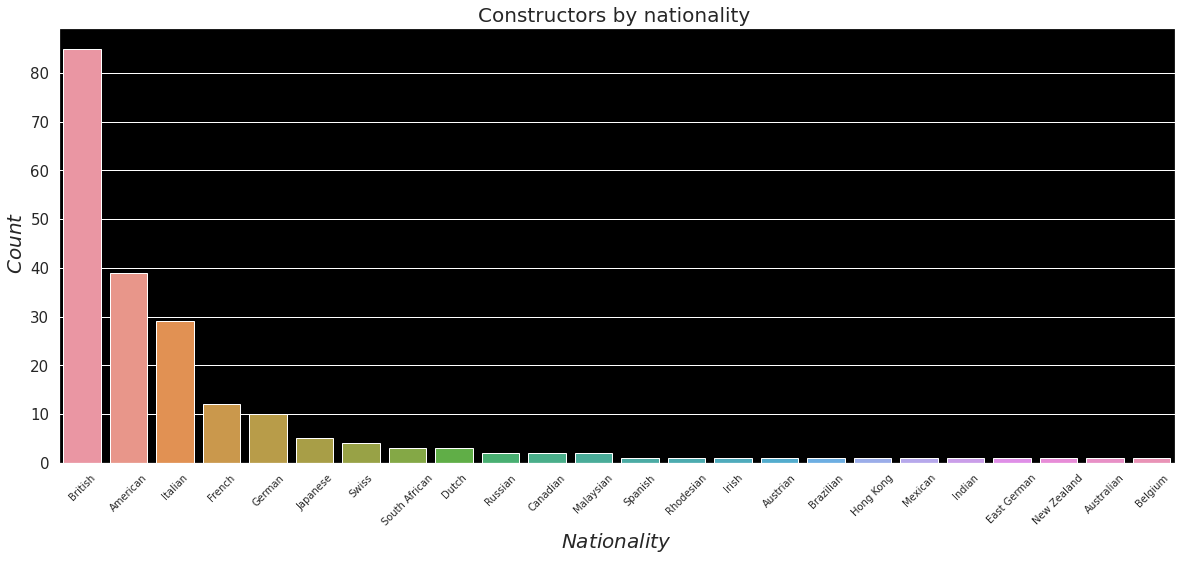

In [ ]:
plt.figure(figsize=(20,8))
sns.set(rc={"axes.facecolor":"#000000", "axes.grid":True,'xtick.labelsize':8,'ytick.labelsize':10})
sns.countplot(x=constructors_df['nationality'],order=constructors_df['nationality'].value_counts().index);
plt.title ('Constructors by nationality ',fontdict={'fontsize':20})
plt.xlabel('$Nationality$' , fontsize = 20)
plt.ylabel(' $ Count$' , fontsize = 20)
plt.xticks(rotation=45,size=10)
plt.yticks(size=15)
plt.show()

In [ ]:
constructorResults_df=pd.read_csv('/content/drive/My Drive/FODS_Project/constructorResults.csv')

In [ ]:
constructorResults_df

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,NaN
1,2,18,2,8.0,NaN
2,3,18,3,9.0,NaN
3,4,18,4,5.0,NaN
4,5,18,5,2.0,NaN
...,...,...,...,...,...
11137,15635,988,1,2.0,NaN
11138,15636,988,3,1.0,NaN
11139,15637,988,210,0.0,NaN
11140,15638,988,15,0.0,NaN


In [ ]:
merge_conresults_con=pd.merge(constructors_df,constructorResults_df,on='constructorId')

In [ ]:
merge_conresults_con

,constructorId,constructorRef,name,nationality,url,constructorResultsId,raceId,points,status
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,1,18,14.0,NaN
1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,14,19,10.0,NaN
2,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,25,20,4.0,NaN
3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,35,21,6.0,NaN
4,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,46,22,8.0,NaN
...,...,...,...,...,...,...,...,...,...
11137,210,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team,15594,984,6.0,NaN
11138,210,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team,15608,985,0.0,NaN
11139,210,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team,15615,986,4.0,NaN
11140,210,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team,15629,987,0.0,NaN


In [ ]:
plt.figure(figsize=(25,8))
d=merge_conresults_con.groupby('name')['points'].sum().nlargest(20)
d

name
Ferrari         7230.5
McLaren         5245.5
Red Bull        3888.5
Mercedes        3718.0
Williams        3565.0
Renault         1383.0
Force India      987.0
Team Lotus       918.0
Benetton         861.5
Lotus F1         706.0
Tyrrell          621.0
Brabham          595.0
Sauber           509.0
BRM              439.0
Ligier           388.0
Toro Rosso       382.0
BMW Sauber       308.0
Jordan           291.0
Toyota           289.5
Lotus-Climax     253.0
Name: points, dtype: float64

<Figure size 1800x576 with 0 Axes>

In [ ]:
import random

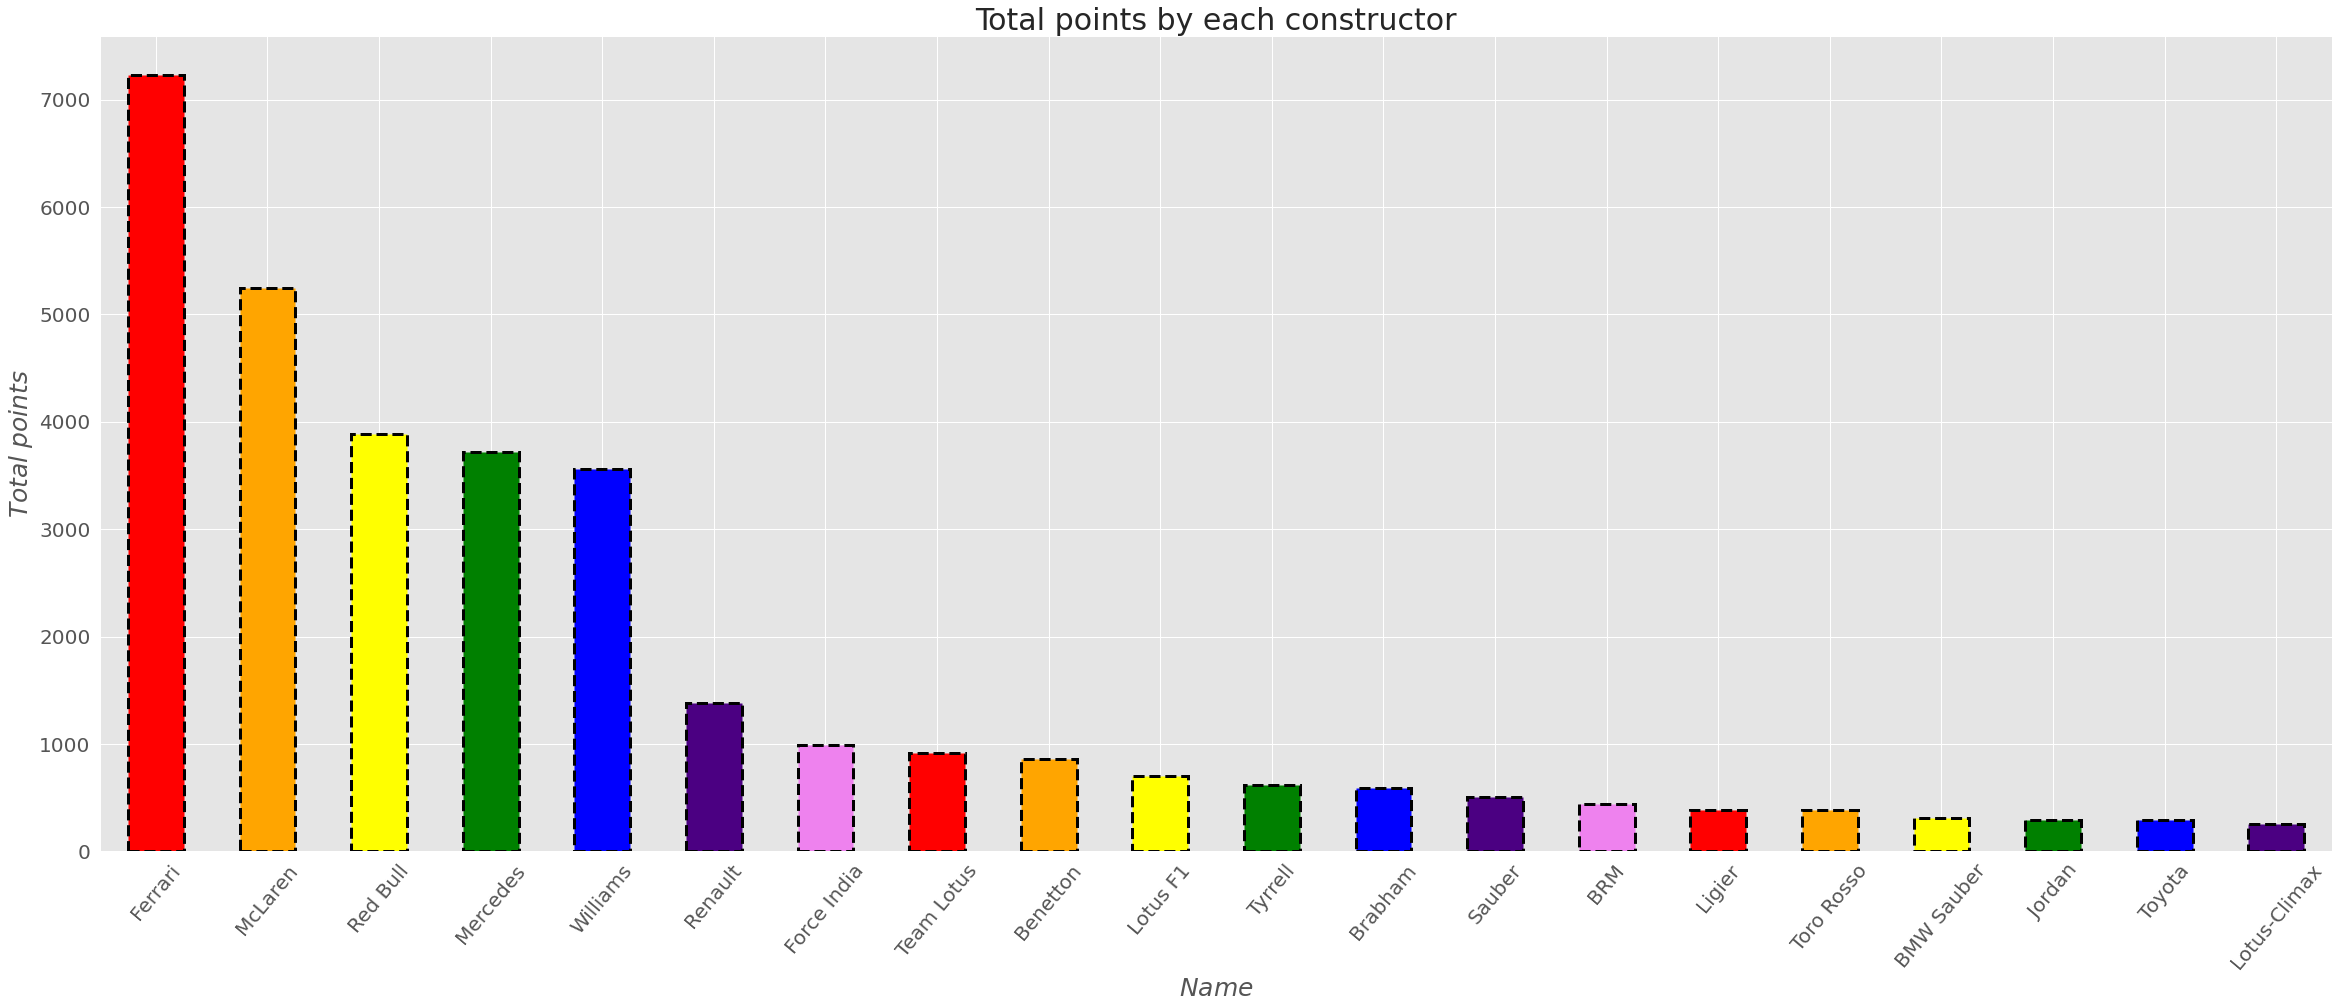

In [ ]:

plt.figure(figsize=(40,15))
plt.style.use('ggplot')
d.plot(kind='bar',color=['red', 'orange', 'yellow', 'green', 'blue','indigo','violet'],edgecolor='black',linewidth=3,linestyle='--')
plt.xlabel('$Name$' , fontsize =25)
plt.ylabel('$Total$ $points$' , fontsize =25)
plt.xticks(size=20,rotation=50)
plt.yticks(size=20)
plt.title('Total points by each constructor',fontdict={'fontsize':30})
plt.show()

In [ ]:
status_df=pd.read_csv('/content/drive/My Drive/FODS_Project/status.csv')

In [ ]:
status_df

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine
...,...,...
129,132,ERS
130,133,+49 Laps
131,134,+38 Laps
132,135,Brake duct


In [ ]:
merge_status_result=pd.merge(status_df,results_df['statusId'],on='statusId')

In [ ]:
merge_status_result


,statusId,status
0,1,Finished
1,1,Finished
2,1,Finished
3,1,Finished
4,1,Finished
...,...,...
23772,132,ERS
23773,132,ERS
23774,132,ERS
23775,135,Brake duct


In [ ]:
merge_status_result['status'].value_counts()

Finished           6009
+1 Lap             3314
Engine             1980
+2 Laps            1492
Did not qualify    1025
                   ... 
CV joint              1
Safety belt           1
Engine misfire        1
+21 Laps              1
Brake duct            1
Name: status, Length: 132, dtype: int64

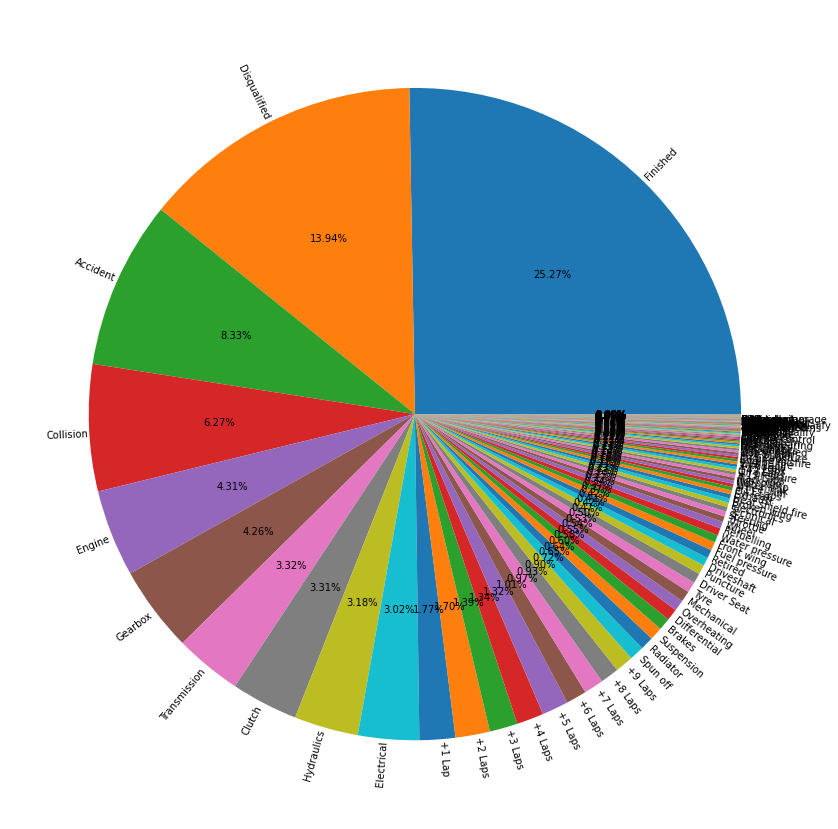

In [ ]:
plt.figure(figsize=(15,15))
s_label=merge_status_result['status'].unique()
plt.pie(x=merge_status_result['status'].value_counts(),autopct='%.2f%%',labels=s_label,labeldistance=1,rotatelabels=True,radius=1)
plt.show()


In [ ]:
circuits_df=pd.read_csv('/content/drive/My Drive/FODS_Project/circuits.csv',encoding='latin1')

In [ ]:
circuits_df

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10.0,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,NaN,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,NaN,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,MontmelÌ_,Spain,41.57000,2.26111,NaN,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,NaN,http://en.wikipedia.org/wiki/Istanbul_Park
...,...,...,...,...,...,...,...,...,...
68,69,americas,Circuit of the Americas,Austin,USA,30.13280,-97.64110,NaN,http://en.wikipedia.org/wiki/Circuit_of_the_Am...
69,70,red_bull_ring,Red Bull Ring,Spielburg,Austria,47.21970,14.76470,NaN,http://en.wikipedia.org/wiki/Red_Bull_Ring
70,71,sochi,Sochi Autodrom,Sochi,Russia,43.40570,39.95780,NaN,http://en.wikipedia.org/wiki/Sochi_Autodrom
71,72,port_imperial,Port Imperial Street Circuit,New Jersey,USA,40.77690,-74.01110,NaN,http://en.wikipedia.org/wiki/Port_Imperial_Str...
